# Compare Covid deaths/cases Ration on ECDC Data 

For this notebook I'm loading data from the ecdc [link to CSV](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv). This data is being updated daily, for this reason try to execute the first code-cell as little as possible.  
  
Thanks to that data, you can compare with this Notebook/function the ratio between deaths and cases with ease.

_**Warning:** the Data structure of the csv changed twice since begun using it 2 weeks ago(cases of columns, extra columns), so beware._


## Basic Setup & reading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

pd.plotting.register_matplotlib_converters()

df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")


## Functions for filtering data and creating Graph 

_(Sorry for the DocStrings I'm still looking for an optimal format for me and am trying to get more into the habit of writing them, so I add them as much as possible)_

In [2]:
def createDataCountry(ddf, countrycode):
    """
    Creates a copy of the dataframe, filtered by countrycode, and adds the columns cumCases, cumDeaths and percent 

    Parameters
    ----------
    ddf : pandas.DataFrame
        dataframe that should be copied and augmented
    countrycode : str
        country code with which the dataframe should be filtered

    Returns
    -------
    pandas.DataFrame
        augmented and filtered copy, of the inital dataframe

    """
    _df = ddf.copy(deep=True)
    _df = _df.reindex(index=_df.index[::-1])
    _df = _df[_df["geoId"] == countrycode]
    _df.dropna()
    _df['cumCases'] = _df['cases'].cumsum()
    _df['cumDeaths'] = _df['deaths'].cumsum()
    _df['percent'] = round((_df['cumDeaths'] / _df['cumCases'])* 100, 4) 
    return _df

def drawComparision(ddf, countrycodes, start_date_string, create_file=False):
    """
    draws a Linegraph for every country code in the countrycodes parameter

    Iterates through all country codes in the countrycodes parameter and plots a line for each.
    
    Warning:
    
    1) Might be better to create the data for the plot all at once and not in the loop, in my intial
    notebook, I didn't think of calling the function more than once. And I didn't feel like refactoring,
    since seems okay performance. I might do this, if I have to alter something. 
    
    2) And yes here multiple copies of the data are being made, ...
    
    Parameters
    ----------
    ddf : pandas.DataFrame
        dataframe that should be copied and augmented
    countrycodes : List
        country codes that should al be ploted in the same graph
    start_date : str
        date from when to look at the data. ( might be better as datetime, maybe in next refactor)
        Warning: Format of the string has to be %d/%m/%Y
    create_file : bool, optional
        this flag says if a image should be created from the plot. (by default 'create_file' is set to False)

    Returns
    -------
    string
        returns the filename of the created image, if no image should be created (parameter 'create_file'), 
        the return value is ''
    """
    result = ''
    start_date = datetime.strptime(start_date_string, '%Y-%m-%d')
    _df = ddf.copy(deep=True)
    fig,ax = plt.subplots(figsize=(16, 8))
    ax.set_xlabel("timeline")
    ax.set_ylabel("deaths / cases")
    #clear up DATE
    _df['dateRep']= pd.to_datetime(_df['dateRep'], format='%d/%m/%Y')
    for cc in countrycodes:
        _ = createDataCountry(_df, cc)
        _ = _[ _["dateRep"] > start_date ]
        ax.plot(_.dateRep, _.percent, marker="o")    
    ax.legend(countrycodes, loc=2)
    plt.xticks(rotation=70)
    plt.show()
    
    if create_file:
        result = 'fig_'  + str(int((datetime.now() - datetime.min).total_seconds())) + '.png'
        fig.savefig(result, dpi=100)
        
    return result

## Using Calling the function

Here you can see how the Function works, and how the quarenteen seems to flatten the curve if started soon. (well in austria, it seems to have worked well).  
_Yes, Yes austria is small, but Germany (DE) has a similar curve (checkout the second graph), and is not that small._

Just fill in the country codes in the variable like these here `country_codes = ['CN','IT', 'AT', 'US']`

CN = China _(Seems strange after the peek, only under 4 %)_  
IT = Italy  
AT = Austria  
US = United States  

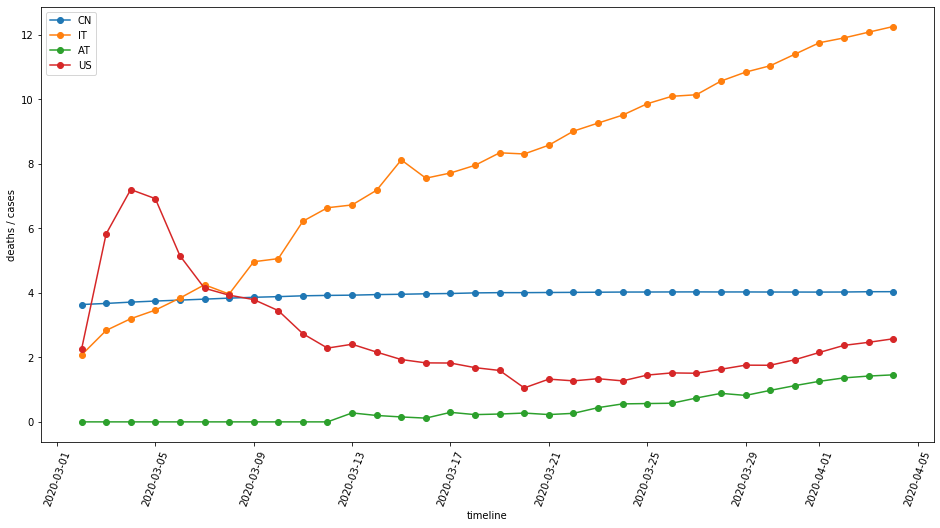

In [3]:
country_codes = ['CN','IT', 'AT', 'US']
last_figure = drawComparision(df, country_codes, '2020-03-01')

## Here some other countries
  
CN = China, as baseline  _(Seems strange after the peek, only under 4 %)_  
ES = Spain  
DE = Germany    
UK = United Kingdom  

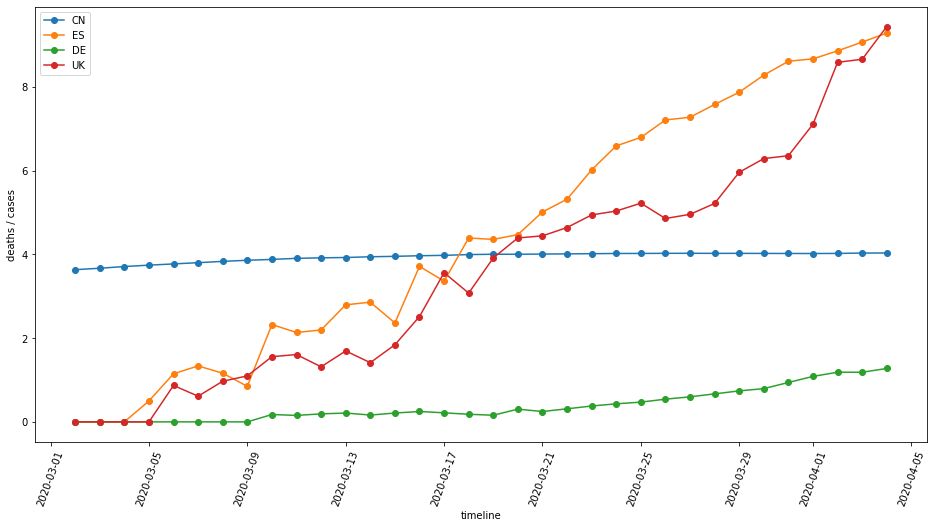

In [4]:
country_codes = ['CN','ES', 'DE', 'UK']
last_figure = drawComparision(df, country_codes, '2020-03-01')